<a href="https://colab.research.google.com/github/04-purnima/Cardiovascular_Risk_Prediction./blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Let us begin with importing the libraries
import pandas as pd # linear algebra
import numpy as np # data processing
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path ='/content/drive/MyDrive/Almabetter Notebooks/MachineLearning(Classification)/data_cardiovascular_risk.csv'
cardiovascular=pd.read_csv(file_path)


In [6]:
print(f"The shape of cardiovascular{cardiovascular.shape}")

The shape of cardiovascular(3390, 17)


In [7]:
print(cardiovascular.columns)

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


In [ ]:
rows = cardiovascular.shape[0]
column = cardiovascular.shape[1]
print(f'There are {rows} Rows and {column} Columns in the Cardiovascular DataFrame')

There are 3390 Rows and 17 Columns in the Cardiovascular DataFrame


In [ ]:
cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
# Lets us print the first and last 10 rows of information of the dataframe.

concat_CV = pd.concat([cardiovascular.head(10),cardiovascular.tail(10)])
concat_CV

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [ ]:
def CVinfo():
    temp = pd.DataFrame(index=cardiovascular.columns)
    temp['data_type'] = cardiovascular.dtypes
    temp["count of non null values"] = cardiovascular.count()
    temp['NaN values'] = cardiovascular.isnull().sum()
    temp['% NaN values'] = (temp['NaN values']/len(cardiovascular)).round(4)*100 # or cardiovascular.isnull().mean()
    temp['unique_count'] = cardiovascular.nunique()
    return temp 
CVinfo()

,data_type,count of non null values,NaN values,% NaN values,unique_count
id,int64,3390,0,0.00,3390
age,int64,3390,0,0.00,39
education,float64,3303,87,2.57,4
sex,object,3390,0,0.00,2
is_smoking,object,3390,0,0.00,2
cigsPerDay,float64,3368,22,0.65,32
BPMeds,float64,3346,44,1.30,2
prevalentStroke,int64,3390,0,0.00,2
prevalentHyp,int64,3390,0,0.00,2
diabetes,int64,3390,0,0.00,2


In [ ]:
cardiovascular.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Statistic Overview
cardiovascular.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


# Plotting features, correlations & more

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

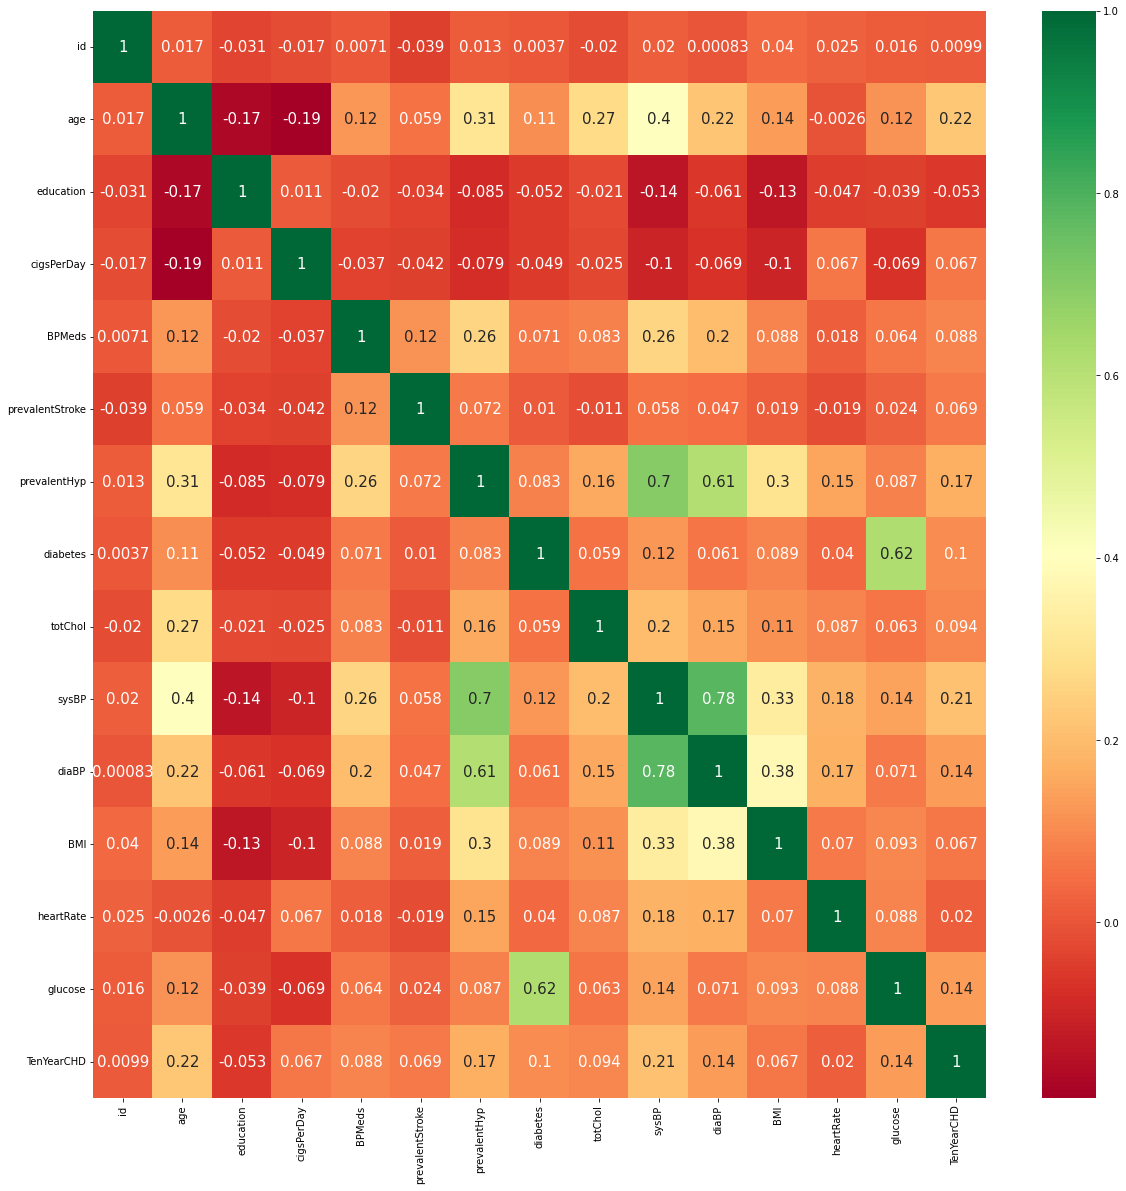

In [ ]:
corr_matrix = cardiovascular.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(cardiovascular[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

# Here, I observed that the EDUCATION attribute is not correlated with any other atttribute.

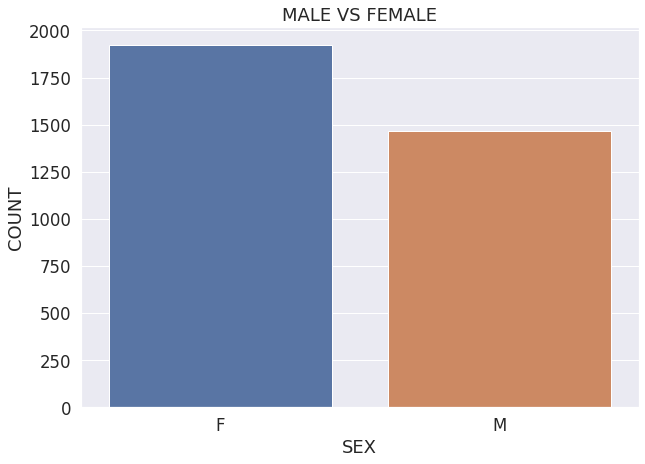

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x=cardiovascular['sex'])
plt.title('MALE VS FEMALE')
plt.xlabel('SEX')
plt.ylabel('COUNT')
plt.show()

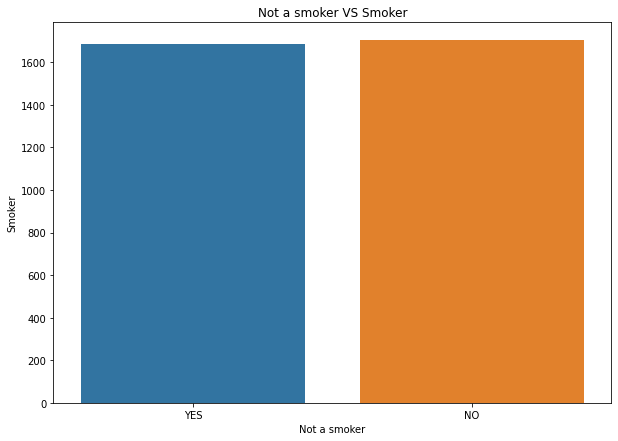

In [9]:
plt.figure(figsize=(10,7))
sns.countplot(x=cardiovascular['is_smoking'])
plt.title('Not a smoker VS Smoker')
plt.xlabel('Not a smoker')
plt.ylabel('Smoker')
plt.show()

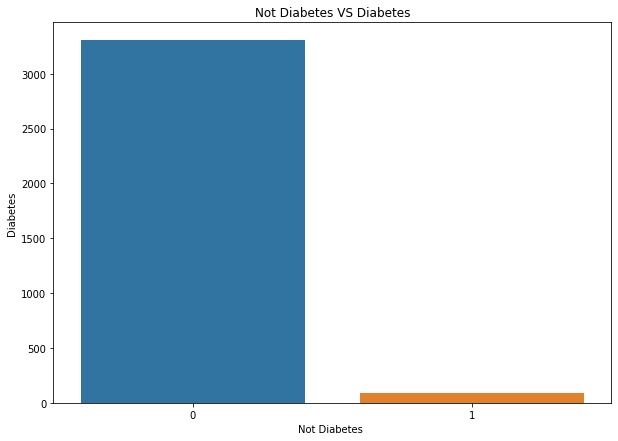

In [11]:
plt.figure(figsize=(10,7))
sns.countplot(x=cardiovascular['diabetes'])
plt.title('Not Diabetes VS Diabetes')
plt.xlabel('Not Diabetes ')
plt.ylabel('Diabetes')
plt.show()

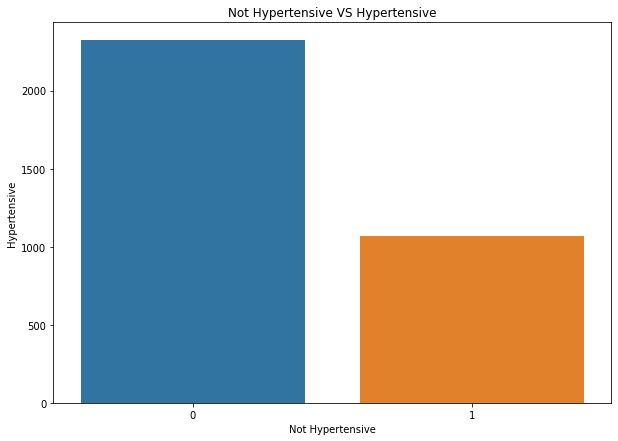

In [13]:
plt.figure(figsize=(10,7))
sns.countplot(x=cardiovascular['prevalentHyp'])
plt.title('Not Hypertensive VS Hypertensive')
plt.xlabel('Not Hypertensive')
plt.ylabel('Hypertensive')
plt.show()

# Now let see various visual representations of the data to understand more about relationship between various feautures.

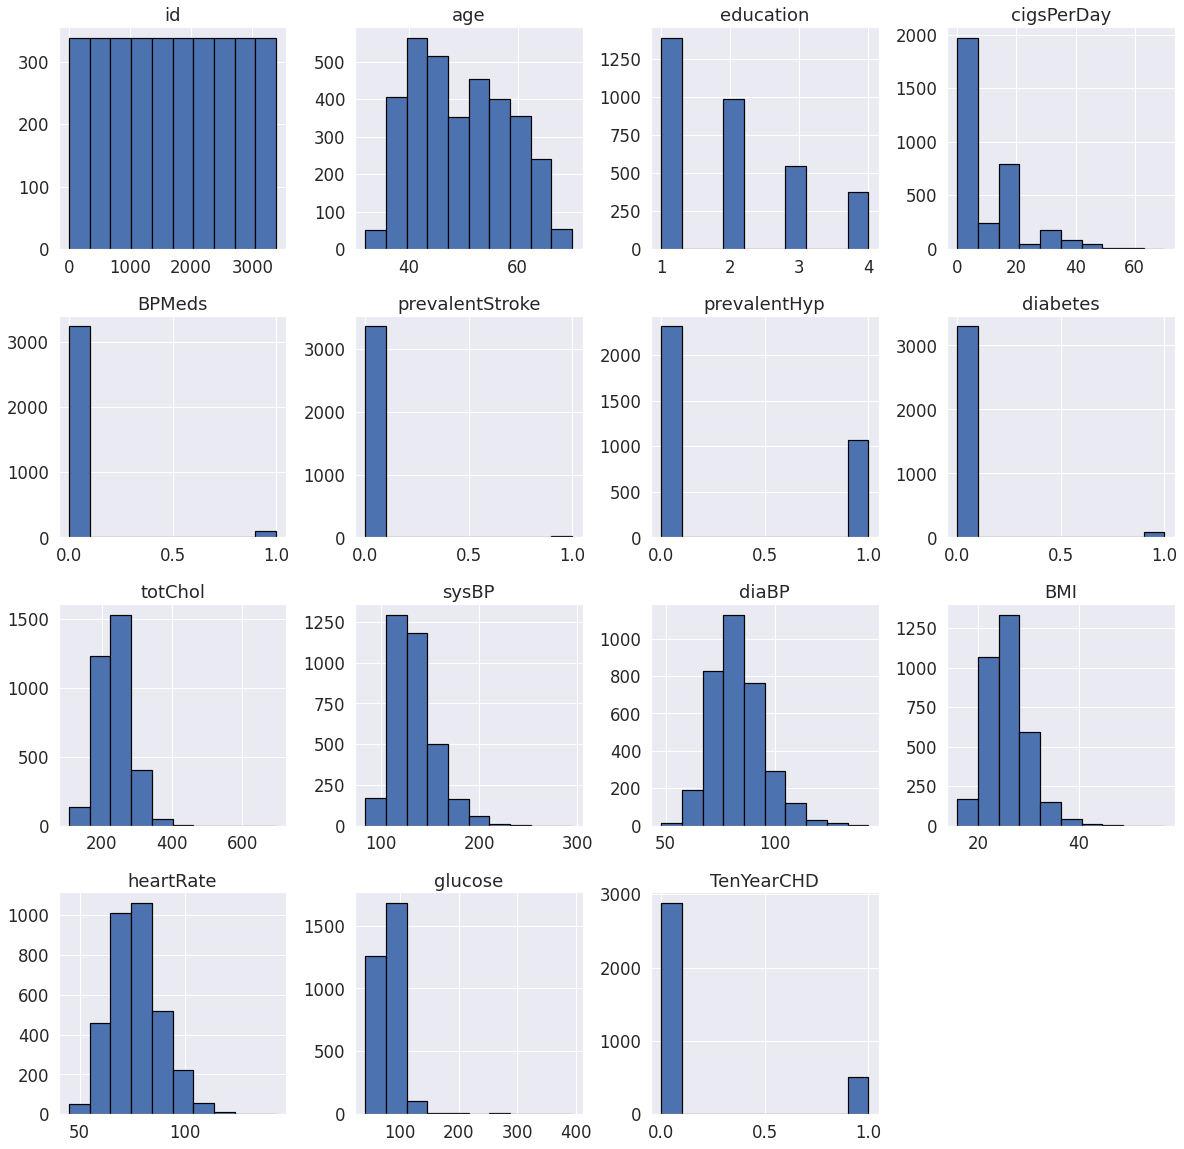

In [ ]:
sns.set(font_scale=1.5)
cardiovascular.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

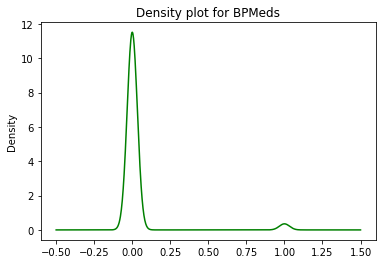

In [20]:
#plotting the density plot 
#using plot.density()
cardiovascular.BPMeds.plot.density(color='green')
plt.title('Density plot for BPMeds')
plt.show()

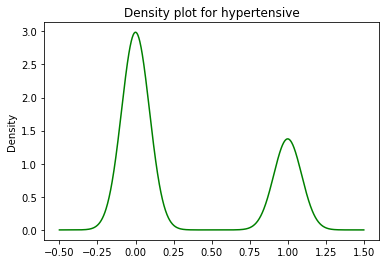

In [24]:
cardiovascular.prevalentHyp.plot.density(color='green')
plt.title('Density plot for hypertensive')
plt.show()

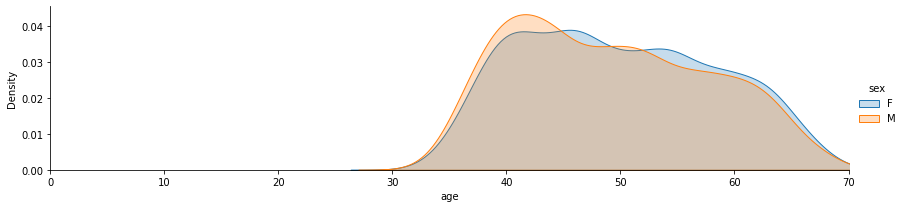

In [26]:
fig = sns.FacetGrid(cardiovascular, hue="sex", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = cardiovascular['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

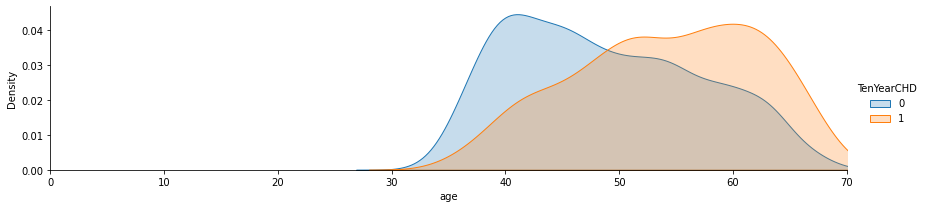

In [28]:
fig = sns.FacetGrid(cardiovascular, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = cardiovascular['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [ ]:
cardiovascular.age.mean()

49.54218289085546

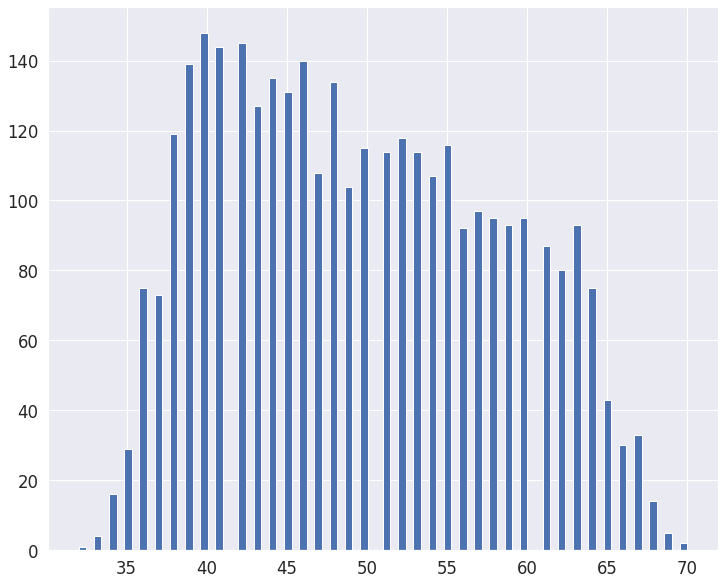

In [ ]:
plt.figure(figsize=(12, 10))
cardiovascular.age.hist(bins=80)

# The most of the patients have a mean age of 50

<Figure size 1440x1080 with 0 Axes>

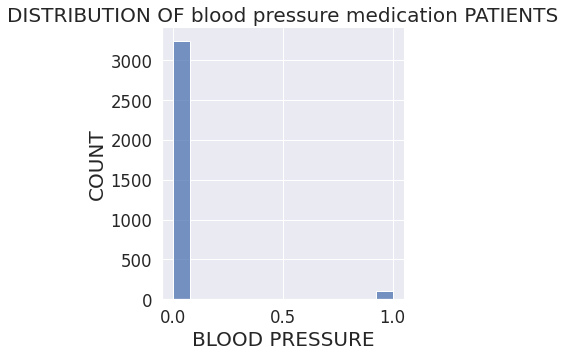

In [ ]:
plt.figure(figsize=(20,15))
sns.displot(cardiovascular["BPMeds"])
plt.title("DISTRIBUTION OF blood pressure medication PATIENTS",fontsize=20)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

# Slightly more males are suffering from CHD than females.
#The percentage of people who have CHD is almost equal between smokers and non smokers.
#The percentage of people who have CHD is higher among the diabetic, and those with prevalent hypertension as compared to those who don’t have similar morbidities.
#A larger percentage of the people who have CHD are on blood pressure medication.

# Checking Missing Values

In [12]:
cardiovascular.isna().mean().round(4)*100

id                 0.00
age                0.00
education          2.57
sex                0.00
is_smoking         0.00
cigsPerDay         0.65
BPMeds             1.30
prevalentStroke    0.00
prevalentHyp       0.00
diabetes           0.00
totChol            1.12
sysBP              0.00
diaBP              0.00
BMI                0.41
heartRate          0.03
glucose            8.97
TenYearCHD         0.00
dtype: float64

In [19]:
cardiovascular_no_NA = cardiovascular[cardiovascular.glucose.isnull()]
print(cardiovascular_no_NA)

        id  age  education sex  ...    BMI  heartRate  glucose  TenYearCHD
9        9   55        2.0   F  ...  25.71       85.0      NaN           0
10      10   61        1.0   F  ...  35.22       80.0      NaN           0
36      36   46        3.0   F  ...  26.18       75.0      NaN           0
38      38   41        2.0   F  ...  22.41       92.0      NaN           0
55      55   51        2.0   F  ...  21.66      100.0      NaN           0
...    ...  ...        ...  ..  ...    ...        ...      ...         ...
3289  3289   40        2.0   M  ...  24.75       79.0      NaN           0
3290  3290   67        1.0   F  ...  33.60       60.0      NaN           0
3349  3349   46        2.0   F  ...  27.40       80.0      NaN           1
3370  3370   46        1.0   F  ...  21.40       66.0      NaN           0
3379  3379   39        1.0   M  ...  31.09       85.0      NaN           0

[304 rows x 17 columns]


In [22]:
cardiovascular_no_NA.filter(["glucose","cigsPerDay","BPMeds", "totChol", "BMI"])

,glucose,cigsPerDay,BPMeds,totChol,BMI
9,NaN,0.0,0.0,326.0,25.71
10,NaN,0.0,0.0,NaN,35.22
36,NaN,0.0,0.0,193.0,26.18
38,NaN,9.0,1.0,180.0,22.41
55,NaN,0.0,0.0,351.0,21.66
...,...,...,...,...,...
3289,NaN,10.0,0.0,195.0,24.75
3290,NaN,0.0,0.0,NaN,33.60
3349,NaN,0.0,0.0,242.0,27.40
3370,NaN,30.0,0.0,219.0,21.40
